In [1]:
# Importando bibliotecas

import os
import glob
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(20)

In [2]:
# Definindo diretório

os.chdir(r"D:\Documents\Scripts\TCC\Hits\Dataset\Bases Tratadas\Spotify")

In [3]:
# Loop para pegar todos os nomes dos CSV

extensao = 'csv'
arquivos = [i for i in glob.glob('*.{}'.format(extensao))]

arquivos

['FINAL_dataset-of-00s.csv',
 'FINAL_dataset-of-10s.csv',
 'FINAL_dataset-of-60s.csv',
 'FINAL_dataset-of-70s.csv',
 'FINAL_dataset-of-80s.csv',
 'FINAL_dataset-of-90s.csv']

In [4]:
# Juntando os arquivos em um só 

data = pd.concat([pd.read_csv(f) for f in arquivos ])
data.reset_index(drop=True, inplace=True)

In [5]:
# Selecionando as colunas que servirão como parâmetro no modelo

y = data.target
x = data[['danceability', 'energy', 'key', 'loudness','mode', 'speechiness', 'acousticness', 
          'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit','sections']]

In [6]:
# Divisão do modelo em treino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=5)

### XGBoost

In [7]:
# Criando o modelo

model = XGBClassifier() 
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\maath\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

           0       0.81      0.72      0.76      5182
           1       0.77      0.85      0.81      5837

    accuracy                           0.79     11019
   macro avg       0.79      0.78      0.79     11019
weighted avg       0.79      0.79      0.79     11019



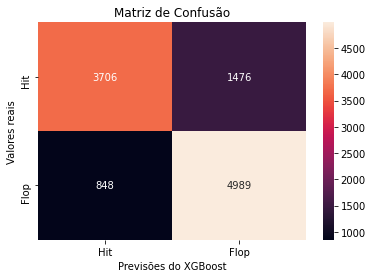

In [8]:
# Matriz de confusão

y_pred = model.predict(x_test)

cf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Previsões do XGBoost');ax.set_ylabel('Valores reais'); 
ax.set_title('Matriz de Confusão'); 
ax.xaxis.set_ticklabels(['Hit', 'Flop']); ax.yaxis.set_ticklabels(['Hit', 'Flop']);

In [9]:
# Validando a importância de cada parâmetro

parametros = model.feature_importances_
parametros

array([0.08949658, 0.05770431, 0.02318012, 0.04082545, 0.09403004,
       0.05651331, 0.08758878, 0.28382745, 0.02780586, 0.04504716,
       0.02928043, 0.05394901, 0.03879402, 0.0268971 , 0.04506046],
      dtype=float32)

In [10]:
# Classificando os parâmetros por sua importância no modelo

sorted(zip(model.feature_importances_, x.columns), reverse=True)

[(0.28382745, 'instrumentalness'),
 (0.094030045, 'mode'),
 (0.089496575, 'danceability'),
 (0.08758878, 'acousticness'),
 (0.057704315, 'energy'),
 (0.056513306, 'speechiness'),
 (0.053949013, 'duration_ms'),
 (0.045060463, 'sections'),
 (0.04504716, 'valence'),
 (0.040825445, 'loudness'),
 (0.038794022, 'time_signature'),
 (0.029280432, 'tempo'),
 (0.027805863, 'liveness'),
 (0.026897095, 'chorus_hit'),
 (0.023180116, 'key')]